In [3]:
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [5]:
scaler = StandardScaler()
#важно чтобы все признаки имели схожиый масштаб, 
#поэтому отмасштабируем их с помощью стандартизации.scaler = StandardScaler()
# обучение модели и приводим к типу дата фрейм
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
# применим модель на тестовой выборке и приводим к типу дата фрейм
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


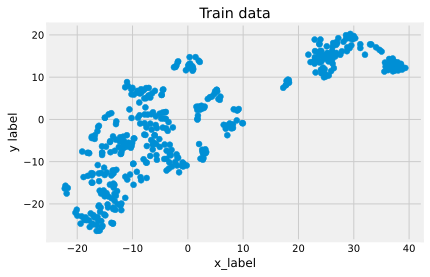

In [16]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.xlabel('x_label')
plt.ylabel('y label')

plt.title('Train data')

plt.show()

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_tsne)

pd.value_counts(labels_train)

2    167
0    136
1    101
dtype: int64

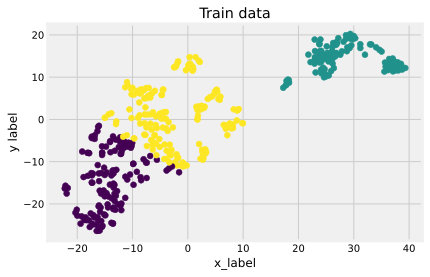

In [31]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.xlabel('x_label')
plt.ylabel('y label')

plt.title('Train data')

plt.show()

In [39]:
print( f" mean_price: {y_train.mean()}, mean_CRIM: {X_train_scaled['CRIM'].mean()} ")

 mean_price: 22.796534653465343, mean_CRIM: -1.8425854901266522e-16 


In [56]:
for labl in range(len(pd.value_counts(labels_train))):
    print( f" labels_train: {labl} ")
    print( f" mean_price: {y_train[labels_train==labl].mean()}\
    , mean_CRIM: {X_train_scaled['CRIM'][labels_train==labl].mean()}")

 labels_train: 0 
 mean_price: 26.564705882352943    , mean_CRIM: -0.39648861651442174
 labels_train: 1 
 mean_price: 16.277227722772277    , mean_CRIM: 1.0797184500240933
 labels_train: 2 
 mean_price: 23.67065868263473    , mean_CRIM: -0.33011444075731805


In [61]:
# Этого не нужно делать, потому, что уже обучили на тренировочной выборке, так?
#X_test_tsne = tsne.fit_transform(X_test_scaled)

labels_test = kmeans.fit_predict(X_test_scaled)
pd.value_counts(labels_test)

1    55
0    38
2     9
dtype: int64

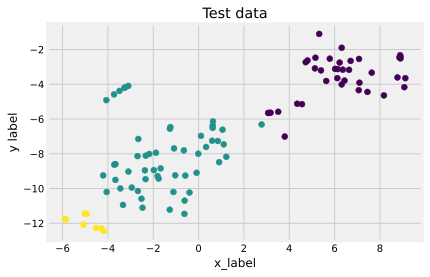

In [62]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

plt.xlabel('x_label')
plt.ylabel('y label')

plt.title('Test data')

plt.show()

In [63]:
for labl in range(len(pd.value_counts(labels_test))):
    print( f" labels_test: {labl} ")
    print( f" mean_price: {y_test[labels_test==labl].mean()}\
    , mean_CRIM: {X_test_scaled['CRIM'][labels_test==labl].mean()}")

 labels_test: 0 
 mean_price: 16.710526315789473    , mean_CRIM: 0.6554617566938616
 labels_test: 1 
 mean_price: 22.690909090909095    , mean_CRIM: -0.38242350296850663
 labels_test: 2 
 mean_price: 34.3111111111111    , mean_CRIM: -0.40257154189495115
